In [125]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import tree
import pydotplus

In [126]:
my_data = pd.read_csv("fraud_oracle 3.csv", delimiter=",")
my_data[0:5]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


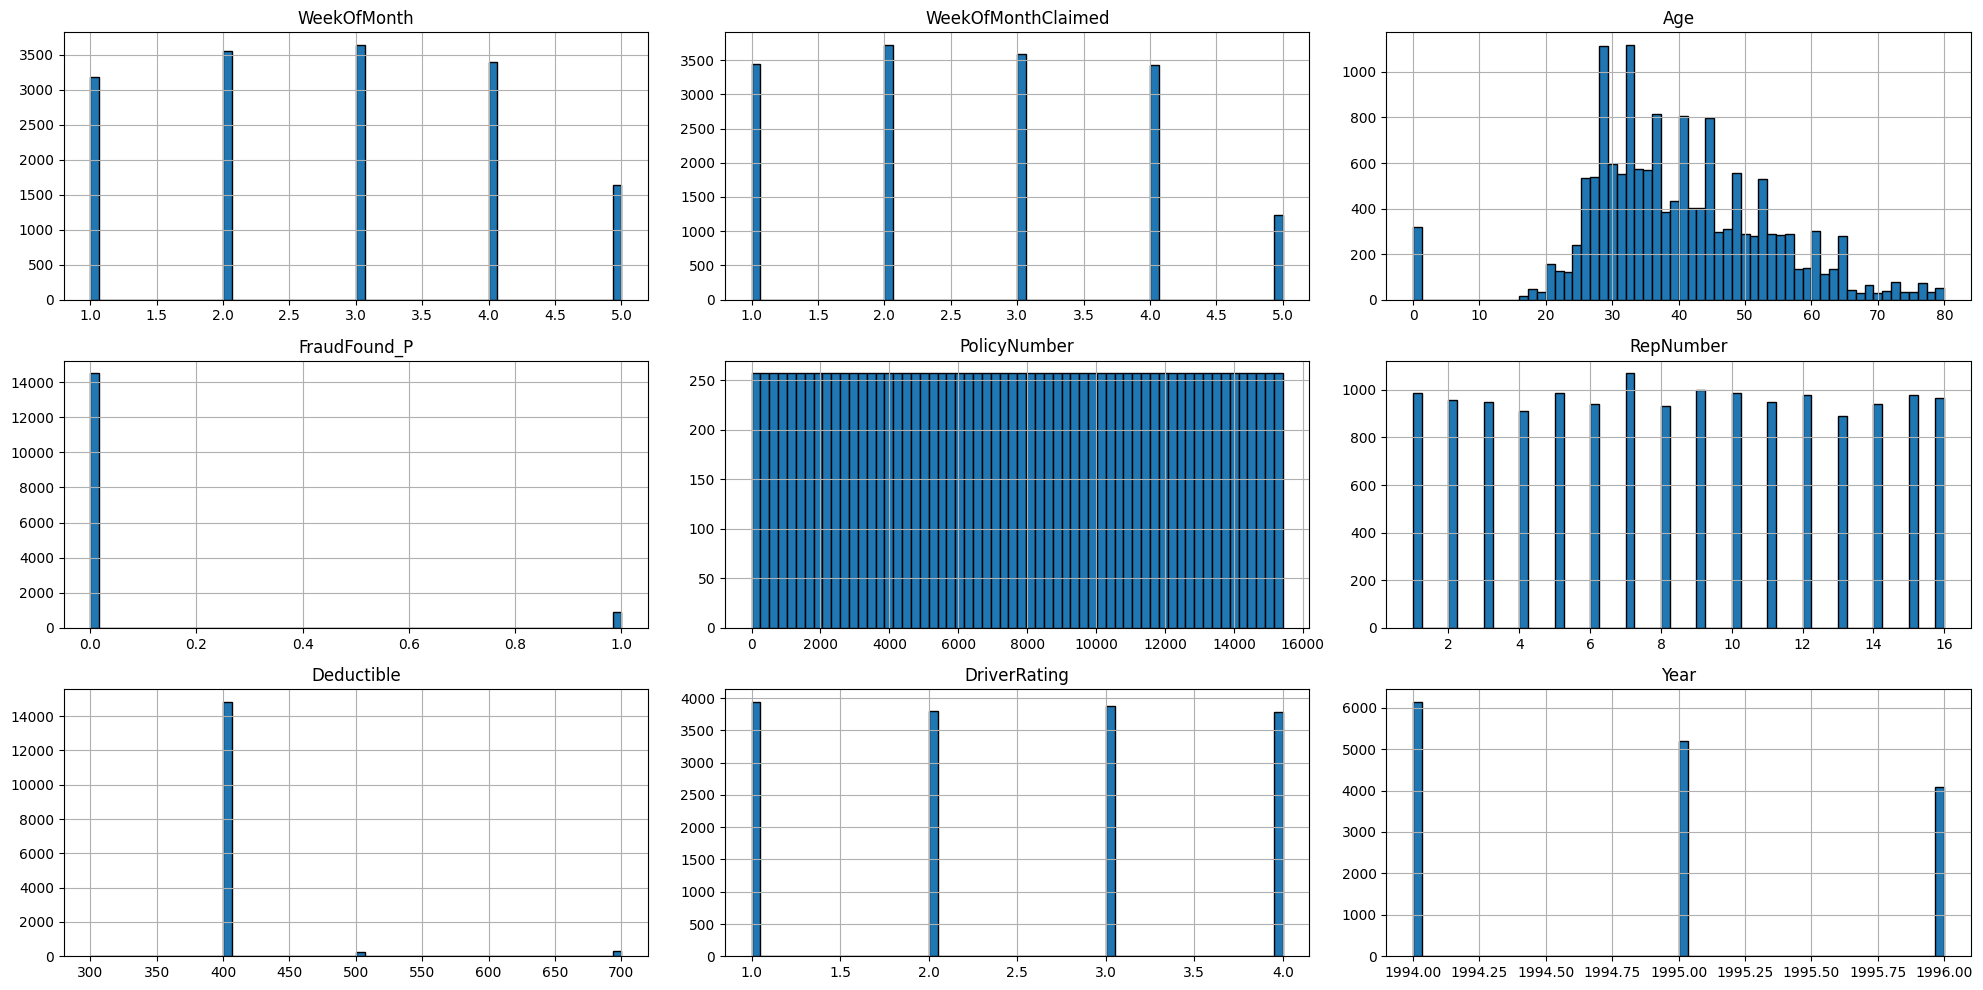

In [142]:
import matplotlib.pyplot as plt

my_data.hist(figsize=(20,10), bins=60, edgecolor='black')
plt.tight_layout()  # Adjusts the plots to fit in the figure area
plt.show()

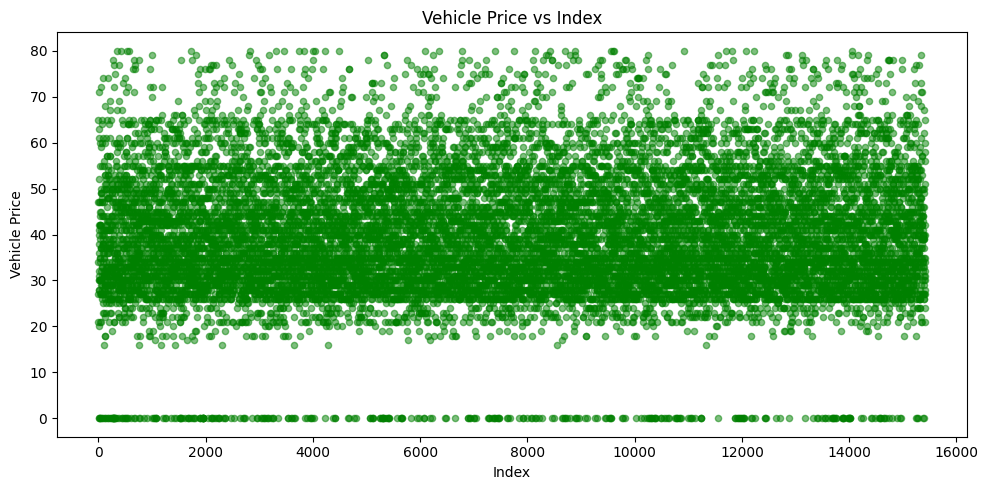

In [147]:
my_data.reset_index().plot(kind='scatter',
                           x='index',
                           y='Age',
                           figsize=(10,5),
                           alpha=0.5,
                           color='green')

plt.title('Vehicle Price vs Index')
plt.xlabel('Index')
plt.ylabel('Vehicle Price')
plt.tight_layout()
plt.show()

In [98]:
X = my_data[['AccidentArea', 'Sex', 'VehiclePrice', 'MaritalStatus', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'VehicleCategory', 'Fault', 'NumberOfCars', 'Year', 'BasePolicy']].values

In [127]:
print("Unique values in 'Sex':", my_data['Sex'].unique())
print("Unique values in 'MaritalStatus':", my_data['MaritalStatus'].unique())
print("Unique values in 'AgeOfVehicle':", my_data['AgeOfVehicle'].unique())
print("Unique values in 'AgeOfPolicyHolder':", my_data['AgeOfPolicyHolder'].unique())
print("Unique values in 'VehicleCategory':", my_data['VehicleCategory'].unique())
print("Unique values in 'Fault':", my_data['Fault'].unique())
print("Unique values in 'NumberOfCars':", my_data['NumberOfCars'].unique())
print("Unique values in 'Year':", my_data['Year'].unique())
print("Unique values in 'BasePolicy':", my_data['BasePolicy'].unique())

Unique values in 'Sex': ['Female' 'Male']
Unique values in 'MaritalStatus': ['Single' 'Married' 'Widow' 'Divorced']
Unique values in 'AgeOfVehicle': ['3 years' '6 years' '7 years' 'more than 7' '5 years' 'new' '4 years'
 '2 years']
Unique values in 'AgeOfPolicyHolder': ['26 to 30' '31 to 35' '41 to 50' '51 to 65' '21 to 25' '36 to 40'
 '16 to 17' 'over 65' '18 to 20']
Unique values in 'VehicleCategory': ['Sport' 'Utility' 'Sedan']
Unique values in 'Fault': ['Policy Holder' 'Third Party']
Unique values in 'NumberOfCars': ['3 to 4' '1 vehicle' '2 vehicles' '5 to 8' 'more than 8']
Unique values in 'Year': [1994 1995 1996]
Unique values in 'BasePolicy': ['Liability' 'Collision' 'All Perils']


In [128]:
le_dict =  {}

for i in range(X.shape[1]):
    if X[:, i].dtype == object:  # Check if the column contains strings
        le = preprocessing.LabelEncoder()
        le.fit(X[:, i])
        X[:, i] = le.transform(X[:, i])
        le_dict[i] = le

In [129]:
# Encoding sex
le_Sex = preprocessing.LabelEncoder()
# Check unique values and adjust fitting accordingly
print(np.unique(X[:, 1])) # Check unique values in 'Sex' column
le_Sex.fit(np.unique(X[:, 1])) # Fit to the unique values in the column
X[:, 1] = le_Sex.transform(X[:, 1])

# Encoding marital status
le_MaritalStatus = preprocessing.LabelEncoder()
# Fit on unique values from the transformed array X, not the original DataFrame
le_MaritalStatus.fit(np.unique(X[:, 3]))
X[:, 3] = le_MaritalStatus.transform(X[:, 3])

# Encoding age of vehicle
le_AgeOfVehicle = preprocessing.LabelEncoder()
# Fit on unique values from the array X to ensure consistency
le_AgeOfVehicle.fit(np.unique(X[:, 4]))
X[:, 4] = le_AgeOfVehicle.transform(X[:, 4])

# Encoding age of policy holder
le_AgeOfPolicyHolder = preprocessing.LabelEncoder()
# Fit on unique values from the array X
le_AgeOfPolicyHolder.fit(np.unique(X[:, 5]))
X[:, 5] = le_AgeOfPolicyHolder.transform(X[:, 5])

# Encoding vehicle category
le_VehicleCategory = preprocessing.LabelEncoder()
# Fit on unique values from the array X
le_VehicleCategory.fit(np.unique(X[:, 6]))
X[:, 6] = le_VehicleCategory.transform(X[:, 6])

# Encoding fault
le_Fault = preprocessing.LabelEncoder()
#Fit on the unique values in the column from X to be consistent
le_Fault.fit(np.unique(X[:, 7]))
X[:, 7] = le_Fault.transform(X[:, 7]) # Change index to 10 to encode the 'Fault' column

# Encoding number of cars
le_NumberOfCars = preprocessing.LabelEncoder()
#Fit the encoder on the unique values in the column from X
le_NumberOfCars.fit(np.unique(X[:, 8])) # Change index to 11 to match 'NumberOfCars' column
X[:, 8] = le_NumberOfCars.transform(X[:, 8])

# Encoding year
le_Year = preprocessing.LabelEncoder()
#Fit the encoder on the unique values in the column from X
le_Year.fit(np.unique(X[:, 9])) # Change index to 12 to match 'Year' column
X[:, 9] = le_Year.transform(X[:, 9])

# Encoding base policy
le_BasePolicy = preprocessing.LabelEncoder()
#Fit the encoder on the unique values in the column from X
le_BasePolicy.fit(np.unique(X[:, 10])) # Change index to 11 to reflect the actual last column
X[:, 10] = le_BasePolicy.transform(X[:, 10]) # Change index to 11


# Display the first few rows of the transformed data
print(X[:5])


[0 1]
[[1 0 5 2 1 3 1 0 2 0 2]
 [1 1 5 2 4 4 1 0 0 0 1]
 [1 1 5 1 5 6 1 0 0 0 1]
 [0 1 0 1 6 7 1 1 0 0 2]
 [1 0 5 2 3 4 1 1 0 0 1]]


In [130]:
Y = my_data["FraudFound_P"].values
Y[0:5]

array([0, 0, 0, 0, 0])

In [131]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)

In [132]:
faultTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
faultTree.fit(X_trainset, Y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [148]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=3), param_grid, cv=5)
grid_search.fit(X_trainset, Y_trainset)

best_tree = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
best_predictions = best_tree.predict(X_testset)
print("Best model's accuracy:", metrics.accuracy_score(Y_testset, best_predictions))

Best parameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.9391328666645775
Best model's accuracy: 0.9424989191526156


In [149]:
predTree = faultTree.predict(X_testset)

In [150]:
predTree

array([0, 0, 0, ..., 0, 0, 0])

In [151]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_testset, predTree))

DecisionTrees's Accuracy:  0.9424989191526156


In [152]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline


In [153]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found


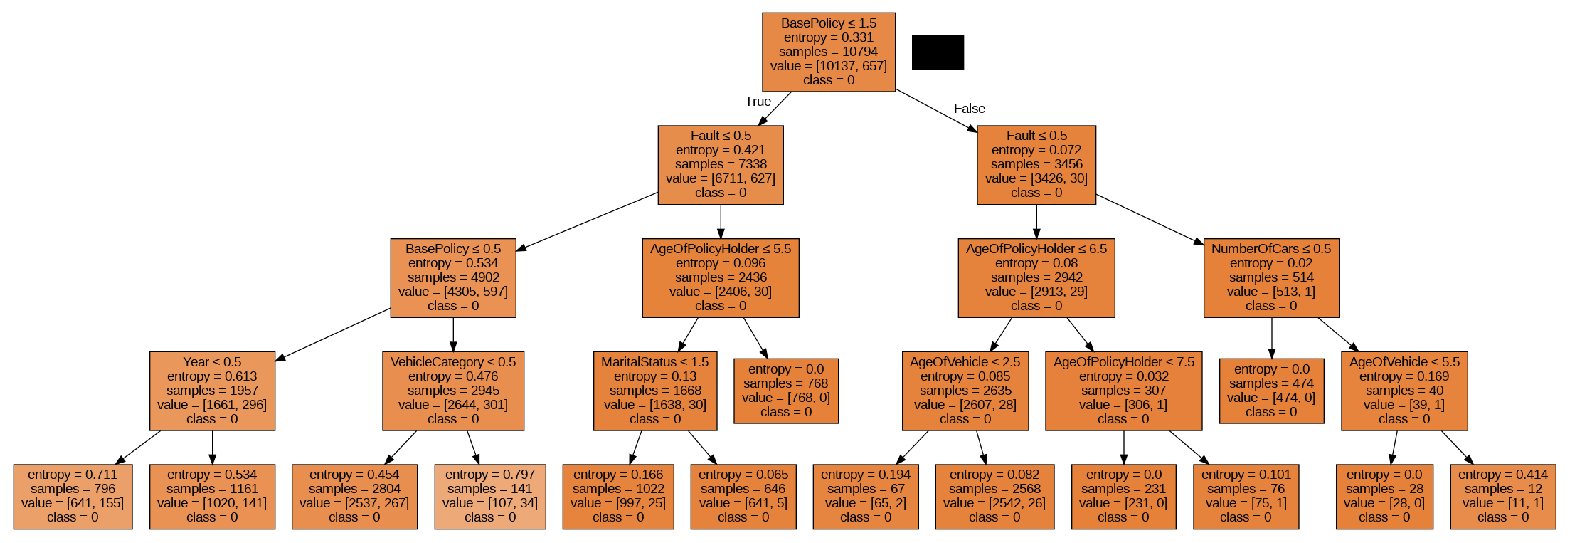

In [154]:
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import tree
import pydotplus


# Create StringIO object
dot_data = StringIO()
filename = "faultTree.png"

# Define feature columns directly here
feature_columns = ['AccidentArea', 'Sex', 'VehiclePrice', 'MaritalStatus', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'VehicleCategory', 'Fault', 'NumberOfCars', 'Year', 'BasePolicy']

# Export the tree to dot format
out = tree.export_graphviz(faultTree,
                           feature_names=feature_columns,
                           out_file=dot_data,
                           class_names=[str(c) for c in np.unique(Y_trainset)],
                           filled=True,
                           special_characters=True,
                           rotate=False)

# Generate graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

# Display the image
img = mpimg.imread(filename)
plt.figure(figsize=(20, 10))  # Adjust the size as needed
plt.imshow(img, interpolation='nearest')
plt.axis('off')
plt.show()

Feature importances:
BasePolicy : 45.40%
Fault : 43.23%
AgeOfPolicyHolder : 3.60%
VehicleCategory : 3.11%
Year : 2.53%
MaritalStatus : 0.92%
NumberOfCars : 0.67%
AgeOfVehicle : 0.53%
VehiclePrice : 0.00%
Sex : 0.00%
AccidentArea : 0.00%


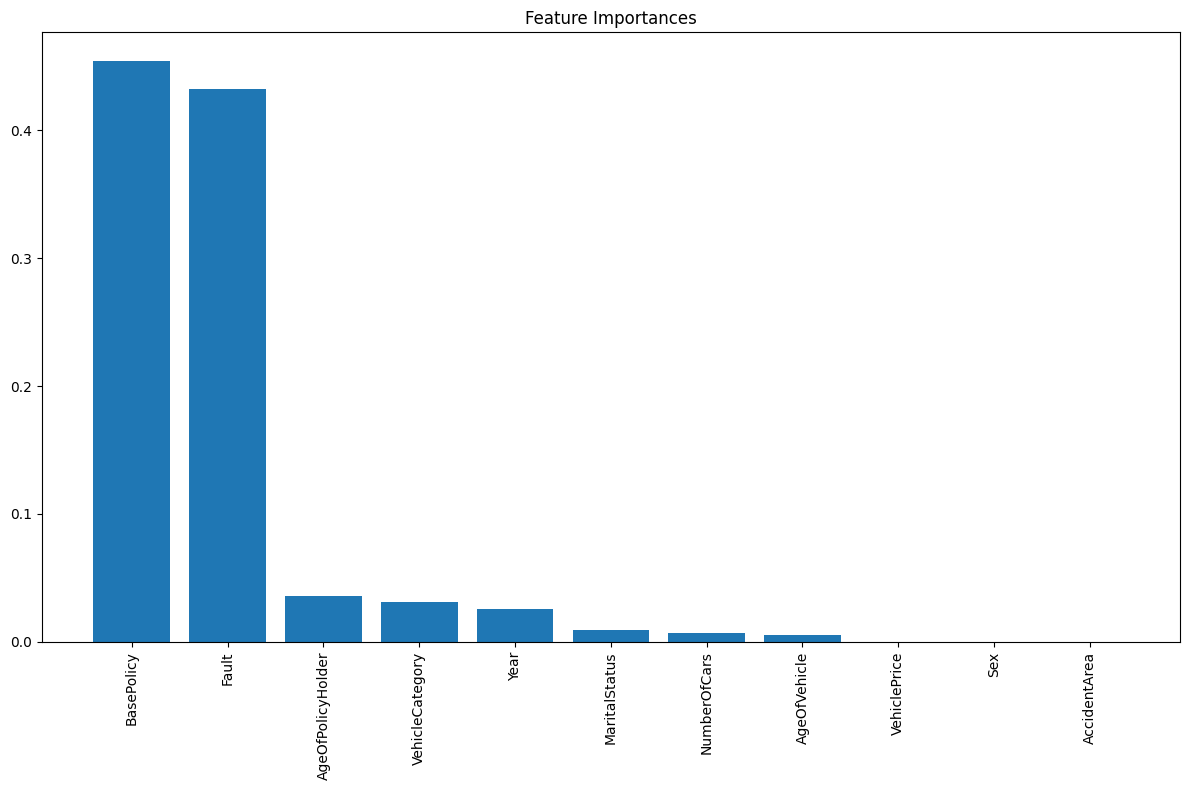

|--- BasePolicy <= 1.50
|   |--- Fault <= 0.50
|   |   |--- BasePolicy <= 0.50
|   |   |   |--- Year <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Year >  0.50
|   |   |   |   |--- class: 0
|   |   |--- BasePolicy >  0.50
|   |   |   |--- VehicleCategory <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- VehicleCategory >  0.50
|   |   |   |   |--- class: 0
|   |--- Fault >  0.50
|   |   |--- AgeOfPolicyHolder <= 5.50
|   |   |   |--- MaritalStatus <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- MaritalStatus >  1.50
|   |   |   |   |--- class: 0
|   |   |--- AgeOfPolicyHolder >  5.50
|   |   |   |--- class: 0
|--- BasePolicy >  1.50
|   |--- Fault <= 0.50
|   |   |--- AgeOfPolicyHolder <= 6.50
|   |   |   |--- AgeOfVehicle <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- AgeOfVehicle >  2.50
|   |   |   |   |--- class: 0
|   |   |--- AgeOfPolicyHolder >  6.50
|   |   |   |--- AgeOfPolicyHolder <= 7.50
|   |   |   |   |--- class: 0
|   |   |   |--- AgeOfPolicy

In [155]:
# Feature importance
importances = faultTree.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{0} : {1:.2f}%".format(feature_columns[idx], importances[idx] * 100))

# Visualize feature importances
plt.figure(figsize=(12,8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [feature_columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Print the tree's text representation
text_representation = tree.export_text(faultTree, feature_names=feature_columns)
print(text_representation)

In [156]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_testset, predTree)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4360    0]
 [ 266    0]]


In [157]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_testset, predTree)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9425


In [158]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(Y_testset, predTree, average='weighted')
recall = recall_score(Y_testset, predTree, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.8883
Recall: 0.9425


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_testset, predTree, average='weighted')
print(f"F1-score: {f1:.4f}")

In [ ]:
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

AUC-ROC: 0.8204


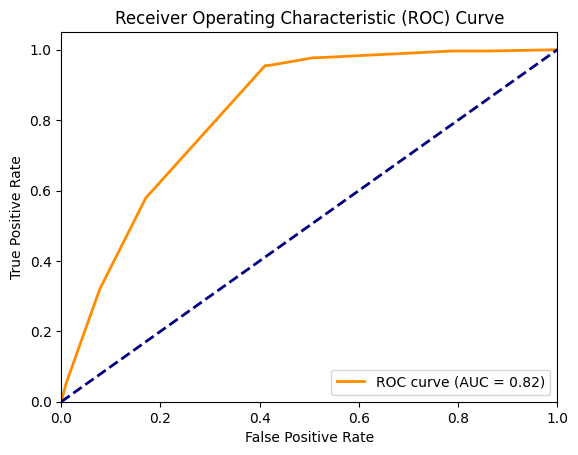

In [159]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_testset, faultTree.predict_proba(X_testset)[:,1])
roc_auc = auc(fpr, tpr)
print(f"AUC-ROC: {roc_auc:.4f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()